<h1 align="center"> Introduction to Data Analysis </h1>

<h3 align="center">    URSCA Summer 2022 <br><br>
    Prof. Daniel Beller, <a href="d.a.beller@jhu.edu">d.a.beller@jhu.edu</a> <br>
assisted by Mr. Jimmy Gonzalez Nuñez <br>
Johns Hopkins University Department of Physics and Astronomy
</h3>

<img src="https://brand.jhu.edu/assets/uploads/sites/5/2014/06/university_logo_small_vertical_blue.png" alt="JHU logo" width=300>

## Background

All quantitative fields of study deal with data. **Data analysis** is, in general, a process of transforming data into useful information, such as

* describing the data
* fitting mathematical models to the data
* testing hypotheses 
* guiding decision-making

etc.

<img src="https://st3.depositphotos.com/3591429/12851/i/950/depositphotos_128519820-stock-photo-people-discussing-about-data-analysis.jpg" alt="data analysis stock photo" width=400>

You've probably heard of **big data** (very large datasets). For example, when Google collects information on our search habits, there's too much data for one person to ever even look at it! So computer algorithms play a key role.

However, a lot of data is still **small**. This is often true in scientific studies, especially in studies on human subjects. With limited data, statistics must be employed carefully to reach correct and reproducible conclusions.

### You're going to college at a very interesting moment in science history...

Over the past decade or so, many scientific fields have been confronting growing evidence that **false positive** results are common in peer-reviewed articles, even in highly reputable journals. A **false positive** is a claim of a **statistically significant effect** (we'll discuss this) where one doesn't exist. 

When other labs try to **replicate** (or "reproduce") the published findings, they will often fail to observe the claimed statistically significant effect, or they observe a much smaller effect. Good science produces results that can be reliably replicated by other labs. 

#### A replicability/reproducibility crisis?

[<img src="https://www.westburg.eu/uploads/fckconnector/dcf5b597-d3ae-4c18-b07f-fce021e431f2" alt="reproducibility crisis Nature poll" width=400 style="float:right">](https://www.nature.com/articles/533452a)

Some people claim that science is experiencing a **reproducibility crisis**. For example:

* Psychology: In replication of 100 published studies, < 40% of results were replicated. [Open Science Collaboration, Science (2015)](https://www.science.org/doi/full/10.1126/science.aac4716?casa_token=LSiFguKkX-QAAAAA:Z2ycWw829pfY2v4bfmejrqjCY9gVoSIBZffuZTeFSW1i9hG-Md1FHq7NQEzYWIlOMldJLF1AKnuYkrY)
* Medicine: Almost two-thirds of supposedly promising new anti-cancer drug compounds didn't work when Bayer tested them. [Prinz et al., Nature Reviews Drug Discovery (2011)](https://www.nature.com/articles/nrd3439-c1.pdf)
* Economics: A replicability study failed to replicate results from 7 of 18 (40%) high-profile previously published studies. [Camerer et al., Science (2016)](https://www.science.org/doi/10.1126/science.aaf0918)

Is the replicability crisis due to outright **fraud** by scientists? While egregious fraud is sometimes committed, that's not the main culprit here. Instead, scientists are *rethinking how we use statistics* in making scientific claims and deciding what gets published. (See ["Why Most Published Research Findings Are False"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1182327/pdf/pmed.0020124.pdf).)

So should you run away from science? <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.pinimg.com%2Foriginals%2F65%2F3c%2Fe8%2F653ce84017b822978ccafb594fe4d611.gif&f=1&nofb=1" alt="snoopy running" width=100> Is it all a bunch of baloney? <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Bologna_lunch_meat_style_sausage.JPG/640px-Bologna_lunch_meat_style_sausage.JPG" alt="balogna" width=100>

***No!!!*** Now is an especially exciting time to work in science, because many fields are in the process of transforming their practices to become more transparent and reproducible. ["Science Isn’t Broken. It’s just a hell of a lot harder than we give it credit for."](https://fivethirtyeight.com/features/science-isnt-broken/)

## Goals for this session

In this session, you'll learn the concept of **statistical significance**, and some ways it is often misused.

Primarily, we'll use a simulated "coin flip" experiment to illustrate concepts. <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/United_States_Quarter.jpg/640px-United_States_Quarter.jpg" alt="quarter" width=150 style="float:right">

We'll use Python to simulate the random coin flips as well as to analyze the data. 
    
<span style="color:purple">Follow along by running the code yourself. Items in purple are for you to try, or think about.</span>

In the process, you will learn some widely used techniques of **data analysis**. 

## Setting up the coin-flip experiment

We'll use the popular numerical Python package *NumPy*, abbreviated as `np`.

In [1]:
import numpy as np

Let's start a pseudo-random number generator (rng). The parameter inside `()` is called the **seed**. <span style="color:purple">Choose your own seed number.</span>

In [2]:
rng = np.random.default_rng(726)

Let's simulate a fair coin being flipped $N=10$ times. 

In [3]:
def coin_flip_sample(rng, num_flips):
    return rng.choice(["T", "H"], size=num_flips)

print(coin_flip_sample(rng, 10))

['T' 'T' 'T' 'T' 'T' 'T' 'T' 'H' 'T' 'H']


We know the fair coin lands on heads half the time on average, but that doesn't mean every 10-coin sample gets exactly 5 heads!

In [4]:
def frac_heads(coin_flip_results):
    """ Calculate the fraction of heads in a coin-flip sample """
    num_flips = len(coin_flip_results)
    num_heads = (coin_flip_results == "H").sum()
    return num_heads / num_flips

for i in range(6):
    results = coin_flip_sample(rng, 10)
    print(results, 100 * frac_heads(results), "% heads")

['H' 'T' 'H' 'H' 'H' 'T' 'T' 'T' 'H' 'H'] 60.0 % heads
['H' 'H' 'H' 'H' 'T' 'H' 'H' 'H' 'T' 'T'] 70.0 % heads
['H' 'T' 'H' 'H' 'T' 'T' 'H' 'T' 'T' 'H'] 50.0 % heads
['T' 'T' 'H' 'T' 'H' 'T' 'T' 'T' 'H' 'T'] 30.0 % heads
['T' 'T' 'T' 'H' 'T' 'T' 'H' 'H' 'T' 'H'] 40.0 % heads
['H' 'H' 'T' 'T' 'H' 'H' 'T' 'H' 'H' 'H'] 70.0 % heads


<span style="color:purple">Try this several times. How often do you get 50%? What is the most extreme value you get?</span>

## Describing data

Let's automate obtaining a series of $N$-coin-flip samples.

In [8]:
def coin_flip_sample_series(rng, num_trials, num_flips_per_trial):
    results = np.array([
        frac_heads(coin_flip_sample(rng, num_flips_per_trial))
        for i in range(num_trials)
    ])
    return results

heads_frac = coin_flip_sample_series(rng, 10000, 1000)

One way to visually summarize the results is a **histogram**.

In [9]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["font.size"] = 14  # make labels more readable
matplotlib.rcParams["figure.figsize"] = [8.0, 6.0]  # make plots bigger

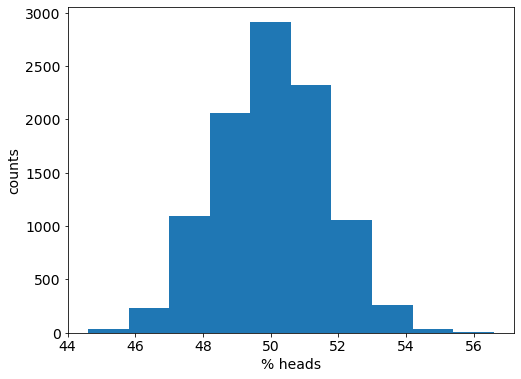

In [7]:
plt.hist(100 * heads_frac)  # multiply by 100 to view as percentages
plt.xlabel("% heads")
plt.ylabel("counts");

<span style="color:purple">Where is the distribution centered? How much is it spread around the center? Does this agree with your expectations?</span> 

To plot probability rather than counts, we can use `density=True` to divide all counts by the total count.

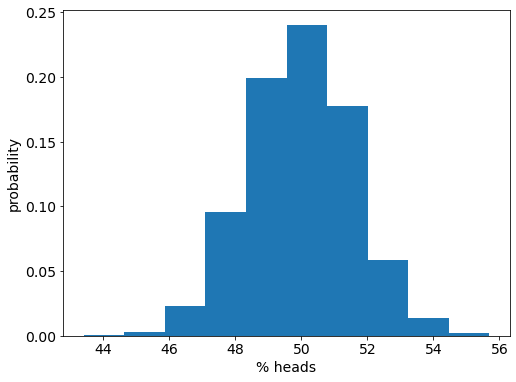

In [544]:
plt.hist(100 * heads_frac, density=True)
plt.xlabel("% heads")
plt.ylabel("probability");

The smallest value is the **minimum**.

In [547]:
np.min(heads_frac)

0.434

The largest value is the **maximum**.

In [548]:
np.max(heads_frac)

0.557

### Measures of centrality

The "middle-most" value is the **median**. Half the values lie above the median, while the other half lie below it.

In [10]:
np.median(heads_frac)

0.5

The 25th percentile is the median of the lower half of the data. 25% of the data lies below it; the other 75% lies above it.

In [11]:
np.percentile(heads_frac, 0.25)

0.4559975

Likewise, the 75th percentile is the median of the upper half other data.

In [12]:
np.percentile(heads_frac, 0.75)

0.463

The 25th percentile, median, and 75th percentile make up the lines of the "box" in a **box-and-whisker plot**.

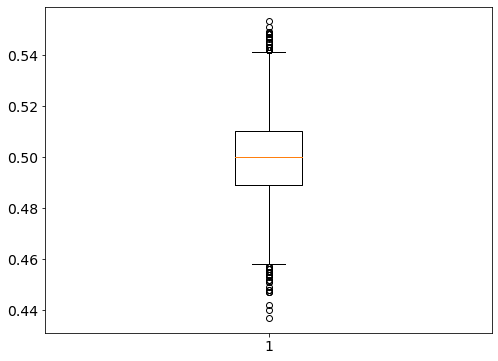

In [13]:
plt.boxplot(heads_frac);

### Mean

The **mean** is the average value. 

$$ \bar x = \frac{1}{N} \sum_{i=1}^N x_i $$

Technically, this is the **arithmetic mean**. It is also frequently referred to as the **expectation value**. We can calculate it ourselves:

In [14]:
heads_frac.sum() / heads_frac.size

0.499934

Or we can use the `.mean()` method:

In [15]:
xbar = heads_frac.mean()
xbar

0.499934

## Measures of variability

Of course, the average of many, many, many trials must be 50% heads, if the coin is fair! 

However, this does *not* mean that *every* trial measures exactly 50% heads. In fact, that only happened < 3% of the time for us. 

In [1098]:
sum(heads_frac == 0.5) / len(heads_frac)

0.0258

Due to chance alone, values higher or lower than 50% will be obtained with some probability. 

But values *much* higher or lower ought to be very rare. 

How can we quantify the spread of data around the mean value? 

First let's shift all values by $\bar x$, so the new mean is zero (up to computational precision):

mean: 1.1507461650239748e-17


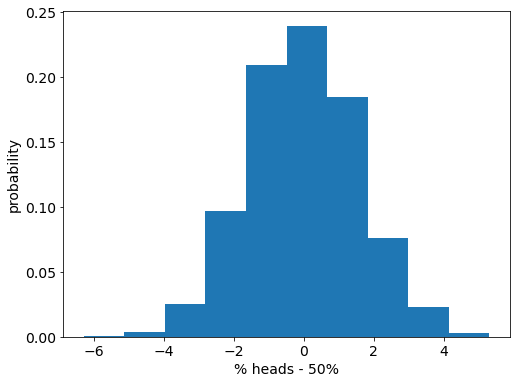

In [17]:
shifted_data = heads_frac - xbar
print(f"mean: {shifted_data.mean()}")
plt.hist(100 * shifted_data, density=True);
plt.xlabel("% heads - 50%")
plt.ylabel("probability");

#### Variance 

If we square the shifted values and then take the mean, we get something nonzero:

In [1101]:
((heads_frac - xbar) ** 2).mean()

0.0002479481859100004

This is called the **variance** and is a measure of the data's spread around the mean value.

The `.var()` method gives thes same result:

In [1102]:
variance = heads_frac.var()
variance

0.0002479481859100004

#### Standard deviation

The square root of the variance is the **standard deviation**.

In [1103]:
np.sqrt(variance)

0.015746370563085334

The `.std()` method computes this for us:

In [1104]:
sigma = heads_frac.std()
sigma

0.015746370563085334

The **standard deviation** $\sigma$ ("sigma") of a measure in a population is

$$ \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2} $$

where $\mu$ is the population (true) mean value. 

For example, if three siblings have ages 3, 7, and 14, then their mean age is $\mu = (3 + 7 + 14)/3 = 8$. The standard deviation of their ages is 

$$ \sigma = \sqrt{\frac{1}{3} \left((3-8)^2 + (7-8)^2 + (14-8)^2\right) } \approx 4.5 $$

In the siblings example, we considered the whole population (only three people). 

For large populations, we usually don't have data for the whole population. Rather, we have a sample of size $N$. We want to infer the population mean $\mu$, but our observations give us the sample mean $\bar x$.

The **sample standard deviation** is 

$$ s = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \bar x)^2}. $$


<span style="color:purple">Find the two differences between the formula for $s$ and that of $\sigma$.</span>



For example, to find the mean age $\mu$ of all people in the U.S., we might randomly select $N=100$ U.S. residents and take their mean age $\bar x$. 

If we do this many times with independently chosen 100-person samples, we would get a range of values clustered around the true mean age. 

To see this, let's randomly generate some ages from a distribution with mean 46 and standard deviation 13, like this:

In [18]:
N = 10
sigma = 13 
print([int(age) for age in rng.normal(46, sigma, size=N)])

[65, 54, 16, 19, 52, 67, 45, 47, 47, 42]


We'll take samples of size $N=100$ people, and we'll repeat the experiment 1000 times.

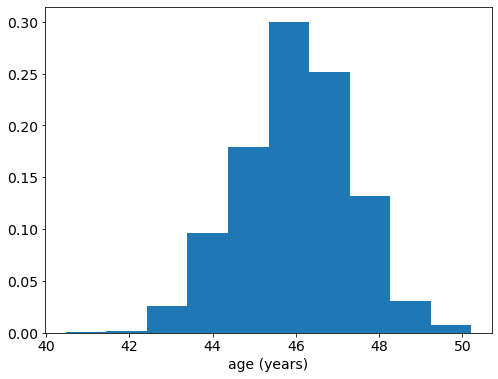

In [22]:
N = 100
sigma = 13

sample_mean_ages = []
for sample_num in range(1000):
    trial_result = rng.normal(46, sigma, size=N)    
    sample_mean_ages.append(trial_result.mean())

# convert to NumPy array 
sample_mean_ages = np.array(sample_mean_ages)

plt.hist(sample_mean_ages, density=True)
plt.xlabel("age (years)");

The sample means are clustered around 46, as expected. 

In [23]:
sample_mean_ages.mean()

45.97855043802121

Let's think carefully abou the standard deviation of `sample_mean_ages`. 

Here, $s$ is the standard deviation *of sample means*, which is called the **standard error of the mean**, $\sigma_{\bar x}$. 

The **standard error of the mean** is related to the **population standard deviation** by:
$$ \sigma_{\bar x} = \frac{\sigma}{\sqrt{N}}. $$

Rearranging, we get $\sigma_{\bar x} \sqrt{N} = \sigma$. Let's check:

In [24]:
std_err = sample_mean_ages.std()
(std_err * np.sqrt(N), sigma)

(13.196708679951241, 13)

As predicted, the standard deviation of sample means is close to the population's standard deviation, divided by the square root of sample size.

### Back to the coin-flip experiment...

If we assign $H\rightarrow 1$, $T\rightarrow 0$, then the mean value $\bar x$ from a sample of $N$ coin-flips is the same as the fraction of coin-flips that are heads. 

Example: $[H, T, H] \rightarrow [1, 0, 1] \Rightarrow \bar x = 2/3=$ (fraction of heads). 

In [25]:
def coin_flips_to_ints(coin_flip_results):
    """ convert H to 1, T to 0 """
    return np.array([
        1 if flip=="H" else 0 
        for flip in coin_flip_results
    ])

example = np.array(["H", "T", "T", "H", "T"])
print(coin_flips_to_ints(example))
print("mean of 1s and 0s:", coin_flips_to_ints(example).mean())
print("fraction of heads:", frac_heads(example))

[1 0 0 1 0]
mean of 1s and 0s: 0.4
fraction of heads: 0.4


With this in mind, let's check how the standard error of the mean $\sigma_{\bar x}$, depends on sample size $N$. 

Let's take 10,000 samples of size $N=10$, then 10,000 with $N=100$ and 10,000 with $N=1000$.

N: 10, standard error of the mean: 0.159
N: 100, standard error of the mean: 0.050
N: 1000, standard error of the mean: 0.016


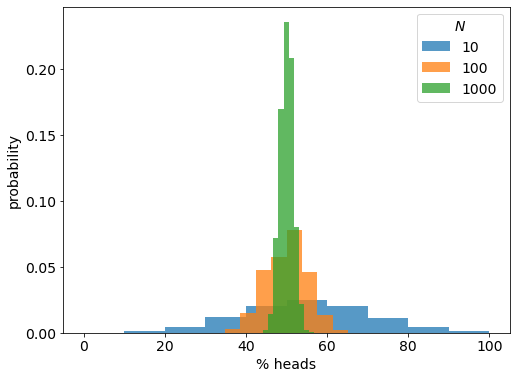

In [26]:
sample_sizes = [10, 100, 1000]
results = [coin_flip_sample_series(rng, 10000, N) for N in sample_sizes]
for result, N in zip(results, sample_sizes):
    plt.hist(100 * result, density=True, alpha=0.75)
    print(f"N: {N}, standard error of the mean: {result.std():.3f}")
plt.legend(sample_sizes, title=r"$N$")
plt.xlabel("% heads")
plt.ylabel("probability");

As sample size $N$ increases, $\sigma_{\bar x}$ decreases! *A larger sample gives a more precise estimate of the mean.*

However, the **population standard deviation**, $\sigma = \sigma_{\bar x} \sqrt{N}$ should not depend on sample size. Let's check:

In [27]:
for result, N in zip(results, sample_sizes):
    sigma = result.std() * np.sqrt(N)
    print(f"N: {N}, sigma: {sigma:.3f}")

N: 10, sigma: 0.503
N: 100, sigma: 0.497
N: 1000, sigma: 0.497


We have found $\sigma \approx 0.5$, the **population standard deviation**, which is a property of the coin itself (independent of sample size). 

#### Standard error describes the spread of sample means around the population mean

About 68% of the data lies $\leq 1 \sigma_{\bar x}$ away from $\mu$:

In [28]:
heads_frac = coin_flip_sample_series(rng, 10000, 1000)
xbar = heads_frac.mean()
std_err = heads_frac.std()

a = xbar - std_err
b = xbar + std_err

frac_obs = 1 - (sum(heads_frac < a) + sum(heads_frac > b)) / len(heads_frac)

print(f"{100 * frac_obs}% of observations lie between {a:.3f} and {b:.3f}.")

67.19999999999999% of observations lie between 0.484 and 0.516.


So, if the coin is a fair one, we expect around 32% of all 1000-flip trials to record $\leq 484$ heads or $\geq 516$ heads. 

About 95% of the data lies  $ \leq 2 \sigma_{\bar x}$ away from $\mu$:

In [29]:
a = xbar - 2 * std_err
b = xbar + 2 * std_err

frac_obs = 1 - (sum(heads_frac < a) + sum(heads_frac > b)) / len(heads_frac)

print(f"{100 * frac_obs}% of observations lie between {a:.3f} and {b:.3f}.")

95.73% of observations lie between 0.468 and 0.532.


About 99.7% of the data lies $\leq 3 \sigma_{\bar x}$ away from $\mu$:

In [30]:
a = xbar - 3 * std_err
b = xbar + 3 * std_err

frac_obs = 1 - (sum(heads_frac < a) + sum(heads_frac > b)) / len(heads_frac)

print(f"{100 * frac_obs}% of observations lie between {a:.3f} and {b:.3f}.")

99.69% of observations lie between 0.453 and 0.547.


### Confidence interval and the $p$-value
Often this is expressed as a ***confidence interval*** for a given ***confidence level***. From the $1\sigma_{\bar x}$ calculation, we have a confidence interval $[484, 516]$ at confidence level $0.68$. 

1 minus the confidence level is the **$p$-value**:  the probability that the observation will lie outside the confidence interval. In this case, $p=0.32$. 

Smaller $p$ indicates greater confidence that the true value lies within the confidence interval. 

The **p-value** of an observation is the probability of obtaining an observation as extreme, or more, given that the null hypothesis is true.

Thus, a low p-value indicates we were unlikely to get the result we got, if the null hypothesis were true. 

### Normal distribution

How can we describe the distributions we've found for "fraction of coin-flips in a trial that land heads-up"?

For $N=1$ flip, the result is "0 heads" with probability 0.5, "1 head" with probability 0.5.

For $N=2$ flips, there are four equally likely sequences: 
$$ \rm TT\; TH\; HT\; HH.$$ Adding up the heads, we see 
* 0 heads with probability 1/4=0.25, 
* 1 head with probability 2/4=0.5, 
* 2 heads with probabiltiy 1/4=0.25. 

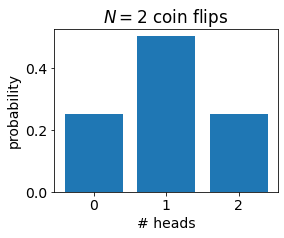

In [32]:
n_heads = [0, 1, 2]
plt.figure(figsize=(4,3))
plt.bar(n_heads, [0.25, 0.5, 0.25])
plt.xlabel("# heads")
plt.ylabel("probability")
plt.xticks(n_heads)
plt.title(r"$N=2$ coin flips");


We could keep going for higher $N$. The general result is the **binomial distribution**. As $N$ becomes a large number, the binomial distribution more and more resembles a smooth function called the **normal distribution** or **bell curve**:

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left[-\frac{1}{2} \frac{(x - \mu)^2}{  \sigma^2}  \right] $$ 

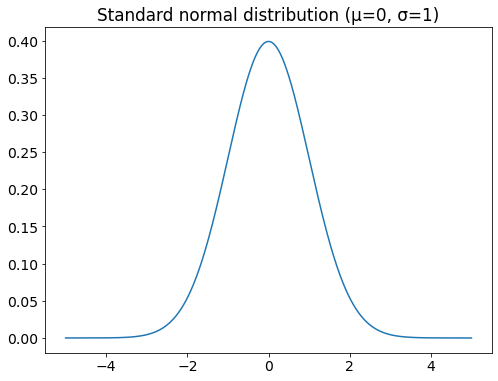

In [35]:
def normal_distribution(x, mu, sigma):
    return (
        1. / (sigma * np.sqrt(2 * np.pi))
        * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    )

x = np.linspace(-5, 5, 1000)
plt.plot(x, normal_distribution(x, 0, 1))
plt.title('Standard normal distribution (μ=0, σ=1)');

Let's check whether the heads-fraction results from our coin-flip trials are described by a normal distribution.

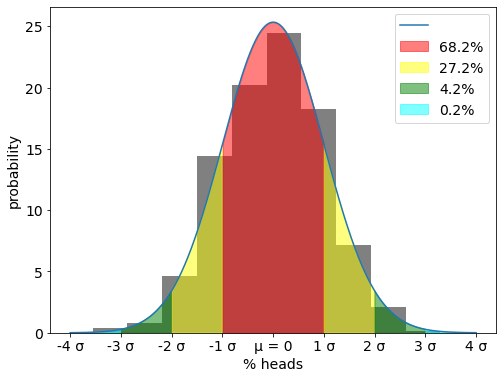

In [41]:
heads_frac = coin_flip_sample_series(rng, 1000, 1000)
mu = heads_frac.mean()
sigma = heads_frac.std()

plt.hist(heads_frac, density=True, color="gray")

x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
plt.plot(x, normal_distribution(x, mu, sigma))

x_normalized = np.abs((x - mu) / sigma)

shading_colors = ['red', 'yellow', 'green', 'cyan']
for k in range(4):
    x_vals_to_shade = (x_normalized > k) * (x_normalized < k + 1)
    plt.fill_between(
        x, 0, normal_distribution(x, mu, sigma), 
        alpha=0.5, color=shading_colors[k],
        where=x_vals_to_shade
    )
    
plt.legend(['', '68.2%', '27.2%', '4.2%', '0.2%'])
plt.xlabel("% heads")
plt.ylabel("probability")
k_range = range(-4, 5)
plt.xticks(
    [mu + k * sigma for k in k_range], 
    labels=[
        "μ = " + str(int(mu)) if k == 0 else str(k) + " σ" 
        for k in k_range
    ]
);


The normal distribution is not just for coin flips! 

A theorem called the **central limit theorem** says that the mean values from many independent samples will tend toward a normal distribution centered at the true mean of the population.

## Hypothesis testing

<img src="https://imgs.xkcd.com/comics/null_hypothesis.png" alt="xkcd null hypothesis" width=175 style="float:right">

Suppose we want to determine whether a coin is fair, or whether it's biased. 

We form a null hypothesis: The coin is fair, meaning that the expected fraction of heads is $\mu_0 = 0.5$.


We should select a confidence level before making observations. A common choice is a 95% confidence interval, i.e. $p=0.05$. Based on our calculations above, about 5% of the observations are expected to lie outside the range $[\mu_0 - 2\sigma_{\bar x}, \mu_0 + 2\sigma_{\bar x}]$.

So we will reject the null hypothesis, at 95% confidence level, if $\bar x - \mu_0$ is $> 2 \sigma_{\bar x}$ or $<-2\sigma_{\bar x}$.

$$ \left| \frac{\bar x - \mu_0}{\sigma_{\bar x}} \right| > 2 \;\;\text{(approximately)}. $$

Actually, the value we wrote as "2" depends on $N$. The right way to do this is to use "Student's $t$-score":

$$ t := \frac{\bar x - \mu_0}{s / \sqrt{N-1}} $$ 

where $s$ is the sample standard deviation. Then,

$$ p \leq 0.05 \Leftrightarrow |t| \geq T \approx 2$$. 

Suppose we flipped a coin 30 times and got 20 heads.

In [42]:
N = 30 
test_dat = np.array([1 if i < (2/3) * N else 0 for i in range(N)])
print("artificial data:", test_dat)

artificial data: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]


We can calculate the $t$-score ourselves:

In [43]:
t_score = (test_dat.mean() - 0.5) / (test_dat.std() / np.sqrt(N-1))
print(f"t: {t_score:.3f}")

t: 1.904


but converting the $t$-score to a $p$-value is not so easy. 

Fortunately, the SciPy has a statistics module with a function for this, `scipy.stats.ttest_1samp()`. We give it the data and $\mu_0$; it tells us $t$ and $p$. 

In [45]:
import scipy.stats 

ttest = scipy.stats.ttest_1samp(test_dat, 0.5)
ttest

Ttest_1sampResult(statistic=1.9039432764659767, pvalue=0.06688289079467755)

Use `.statistic` to get $t$, `.pvalue` to get $p$:

In [46]:
print(f"t: {ttest.statistic:.3f}")
print(f"p: {ttest.pvalue:.3f}")

t: 1.904
p: 0.067


Here, we got $p>0.05$ so we do *not* reject the null hypothesis. 

Even though $20/30\approx 0.667$  is quite a bit higher than $0.5$, the results are **not statistically significant** at $p=0.05$: A fair coin is expected to produce this result more than once for every 20 trials, so we cannot declare that the coin is biased with 95% confidence.


However, suppose we had *instead* done three times as many coin flips and observed the same ratio of heads to tails:

In [47]:
N = 90

test_dat_2 = np.array([1 if i < (2/3) * N else 0 for i in range(N)])
print("artificial data:", test_dat_2)

scipy.stats.ttest_1samp(test_dat_2, 0.5)

artificial data: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Ttest_1sampResult(statistic=3.3354160160315827, pvalue=0.0012435163135804924)

Since $p < 0.05$, the results are considered **statistically significant**: The probability of an observation this extreme or more, at this larger sample size, is less than 0.05 if the null hypothesis is true. We now **reject the null hypothesis** and conclude that the coin is biased. 

This artificial example illustrates how larger sample sizes increase the odds of correctly rejecting the null hypothesis, which is called **statistical power**. 

However, the example also hints at some drawbacks of the $p$-value approach, and ways it can be misused. 

## Types of error

**False positive** (a.k.a. "Type I Error"): Rejecting the null hypothesis even though it's true. 
* The $p$-value is the probability of a false positive. 
* Small $p$ implies higher confidence in rejecting the null hypothesis.

**False negative** (a.k.a. "Type II Error"): Not rejecting the null hypothesis even though it's false. 
* The probability of obtaining a false negative is called β ("beta").
* 1-β is the **statistical power**. This is the probability of rejecting the null hypothesis if it is false.

Example: COVID rapid test—
* False positive: Don't have COVID but test positive.
* False negative: Have COVID but test negative. 





When we choose $p=0.05$, we *expect* that 5%, or 1 in 20, of our observations will give a ***false positive***: We will reject the null hypothesis based on the observations, even though the null hypothesis is true. 

Let's check how often we will incorrectly reject the null hypothesis for a fair coin with single trials of $N=100$ flips.

In [48]:
N = 100

p_vals = []
for trial_num in range(100):
    heads_tails = coin_flip_sample(rng, N)
    ones_zeros = coin_flips_to_ints(heads_tails)
    p_val = scipy.stats.ttest_1samp(ones_zeros, 0.5).pvalue
    p_vals.append(p_val)

num_significant = sum([p_val < 0.05 for p_val in p_vals]) 
frac_significant = num_significant / len(p_vals)
print(100 * frac_significant, "% false positives")

6.0 % false positives


<span style="color:purple">Try running the cell above several times and seeing the range of values you get.</span>

#### Consider...

Professor Coinsworthy has a hypothesis that a certain coin is biased. The professor assigns six student researchers to flip the coin $N=100$ times.

* Student 1 gets 52 heads.
* Student 2 gets 41 heads.
* Student 3 gets 50 heads.
* Student 4 gets 39 heads
* Student 5 gets 53 heads.
* Student 6 gets 48 heads.

Only Student 4's observation is statistically significant. <span style="color:purple">Can you show this?</span>

Prof. Coinsworthy believes Student 4 is more capable than the other students, and makes Student 4 the lead author on a journal article about the statistically significant findings. The other students' findings are not published.

<span style="color:purple">Did Professor Coinsworthy make a good decision? Discuss.</span>

#### Example: a well-intentioned student researcher

Alex is a well-intentioned student researcher in Prof. Coinsworthy's lab in the Department of Numismatics. Alex has a strong hunch that a certain coin is biased. A first experiment, involving only ten coin-flips, does not allow Alex to reject the null hypothesis:

In [54]:
rng2 = np.random.default_rng(4)
obs = rng2.choice(["T", "H"], size=10)
print(obs)

['H' 'H' 'H' 'H' 'H' 'H' 'H' 'T' 'T' 'H']


In [55]:
scipy.stats.ttest_1samp(coin_flips_to_ints(obs), 0.5)

Ttest_1sampResult(statistic=2.2500000000000004, pvalue=0.05100326070695074)

Alex decides to add ten more coin-flips to the observations.

In [56]:
obs = np.append(obs, rng2.choice(["T", "H"], size=10))
scipy.stats.ttest_1samp(coin_flips_to_ints(obs), 0.5)

Ttest_1sampResult(statistic=1.9023794624226835, pvalue=0.07239002577225488)

Alex still can't reject the null hypothesis! But Alex is diligent and keeps taking data.

In [57]:
dat = []
for i in range(30):
    obs = np.append(obs, rng2.choice(["T", "H"]))
    p_val = scipy.stats.ttest_1samp(coin_flips_to_ints(obs), 0.5).pvalue
    dat.append([len(obs), p_val])

Here's what the $p$-value looks like with each additional coin-flip.

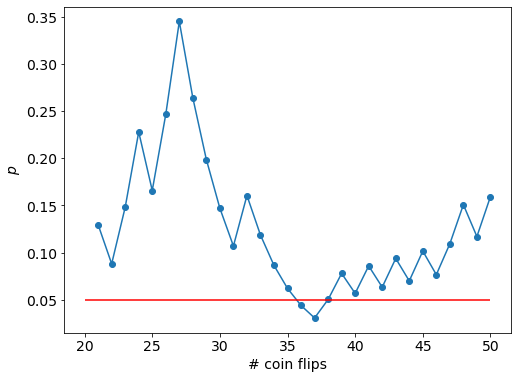

In [58]:
n = [row[0] for row in dat]
nstdevs = [row[1] for row in dat]
plt.plot(n, nstdevs, 'o-')
plt.xlabel('# coin flips')
plt.hlines(0.05, 20, 50, color="red")
plt.ylabel(r'$p$');

Look at that! If Alex had stopped at $N=36$ or $37$ coin flips, the observation would have $p<0.05$, allowing Alex to reject the null hypothesis... right!? 

<span style="color:purple"> Think carefully: what are the flaws in Alex's procedure?<span>

While there will always be *some* false positives, Alex's approach practically *guaranteed* a rejection of the null hypothesis. By changing the experimental design on the fly, in order to reach a desired conclusion, Alex generated a false result in a manner contrary to good science. Publishing this result would be misleading to other researchers and perhaps even the public, and could harm the reputation of Alex and Alex's advisor. 

What Alex has done here is an example of [**p-hacking**](https://www.methodspace.com/blog/primer-p-hacking). It is bad science... but it's unfortunately common because of the incentive to publish.

<span style="color:purple">Discuss: What practices could Alex have followed to avoid this situation?</span>

The website [fivethirtyeight.com](https://fivethirtyeight.com) put together a great demonstration of $p$-hacking in social science. 

<span style="color:purple">Try it out... can you get two publishable results that contradict each other?</span>

In [59]:
from IPython.display import HTML

HTML("""
<iframe 
    src="https://projects.fivethirtyeight.com/p-hacking/index.html"
    title="Hack Your Way To Scientific Glory" 
    width=100% 
    height=500 
>
</iframe>
""")

### False negatives

We can give our simulated coin a bias $b$, such that the probabilities are
* heads: $0.5 + b$
* tails: $0.5 - b$

In [60]:
def biased_coin_flip_sample(rng, num_flips, bias=0.):
    coin_flip_results = rng.choice(["T", "H"], size=num_flips, p=[0.5 - bias, 0.5 + bias])
    return coin_flip_results

An example with bias $=0.1$:

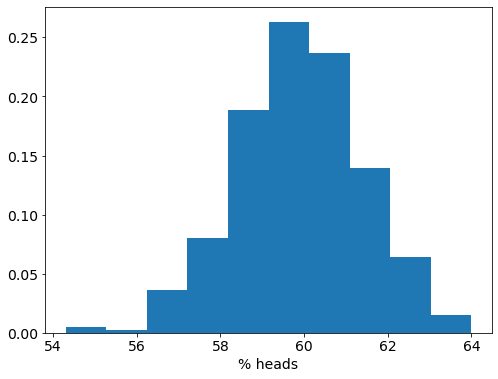

In [61]:
N = 1000
n_samples = 400
samples = [    
    100 * frac_heads(biased_coin_flip_sample(rng, N, bias=0.1)) 
    for i in range(n_samples)
]

plt.hist(samples, density=True)
plt.xlabel("% heads");

We give the coin to Professor Coinsworthy to examine, without telling him whether it's a fair coin. He conducts an experiment to test the null hypothesis that the coin is fair. He takes one sample of $N=100$ flips.

In [62]:
N = 100
obs = biased_coin_flip_sample(rng, N, bias=0.1)
scipy.stats.ttest_1samp(coin_flips_to_ints(obs), 0.5)

Ttest_1sampResult(statistic=1.6127570249962868, pvalue=0.10998066941759069)

<span style="color:purple">Does Professor Coinsworthy reject the null hypothesis? Raise your hand if so.</span>


Let's make this harder for the professor and give him two coins: 
* Coin 1 has a 1% bias
* Coin 2 is fair. 

Can the professor find a statistically significant difference based on 100 flips of each coin? 

We'll use the $t$-test comparison of two independent datasets: `scipy.stats.ttest_ind()`.

Null hypothesis: both coins have the same probability of landing on heads.

In [63]:
N = 100

obs1 = biased_coin_flip_sample(rng, N, bias=0.01)
obs2 = biased_coin_flip_sample(rng, N, bias=0.)
scipy.stats.ttest_ind(
    coin_flips_to_ints(obs1), 
    coin_flips_to_ints(obs2)
)

Ttest_indResult(statistic=-1.2721498683678332, pvalue=0.20481189960407287)

<span style="color:purple">Does Professor Coinsworthy reject the null hypothesis? Raise your hand if so.<br>
If not, is this a Type I Error (false positive) or a Type II Error (false negative)?</span>

Suppose Professor Coinsworthy had instead used $N=20000$. <span style="color:purple">(Try it!) Raise your hand if he rejects the null hypothesis.</span>

## Discussion of $p$-hacking

We like to think of science as an objective enterprise, free from human bias. 

However, designing experiments and analyzing data always requires some decisions by the scientist. Unfortunately, it is far too common that these decisions are adjusted after the fact to obtain a publishable result with $p<0.05$. 

Thus, the scientific literature contains many **false positives**, results claiming a significant effect that other labs will fail to reproduce. 

Currently, there is debate about the use of $p<0.05$ as a common standard for publication.

## Effect size

There are times when we measure a large effect, but with high p-value (low confidence). 

There are other times when we have low p-value (high confidence in rejecting the null hypothesis), yet the **effect size** is small.

That is to say, statistical significance does not equate to importance. 

For example, a study on aspirin found that it reduces heart attacks with very high statistical significance: $p < 0.00001$. Yet the effect size was very small: the mean reduction in heart attack chances was only 0.77%. ([Sullivan and Feinn, "Using effect size—or why the $P$ value is not enough". *J. Grad. Med. Educ.*, 2012](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3444174/)). 


Example: Professor Coinsworthy spends two years and a lot of grant money to obtain a large $N=$ 10,000,000 sample of flips of the U.S. quarter. Suppose he gets 5,003,203 heads and 4,996,793 tails.

In [64]:
n_heads = 5003207
n_tails = 4996793
artificial_data = np.array([1] * n_heads + [0] * n_tails)
scipy.stats.ttest_1samp(artificial_data, 0.5)

Ttest_1sampResult(statistic=2.0282852070296538, pvalue=0.04253117432088234)

It's a statistically significant result! 

Professor Coinsworthy thinks: "The quarter is biased! This has huge implications for society... think of all the sports games where a coin-flip decides who gets the ball first! I will call my senator and a reporter from *Scientific American* to tell them about my discovery!"

But what is the **effect size**? A standard measure is to take the difference between the measured mean and $\mu_0$ (here, $0.5$), then divide by the sample standard deviation.

$$ \frac{\bar x - \mu_0}{s} $$ 

Values $\lesssim 0.2$ are considered a "small" effect.

In [65]:
(artificial_data.mean() - 0.5) / artificial_data.std()

0.0006414001319339945

That's a *very* small effect! The quarter might be a tiny bit biased, but this has no consequences for realistic usages of the quarter. 

## Regression

Let's grab a dataset about penguins from the internet (data credit: Dr. Kristen Gorman via Allison Horst via [Seaborn](https://github.com/mwaskom/seaborn-data)).

We will use the data analysis package "Pandas" to read the data. 

In [153]:
import pandas 
data_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
data = pandas.read_csv(data_url).dropna()

In [154]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Let's pick two columns and plot them together in a **scatter plot**.

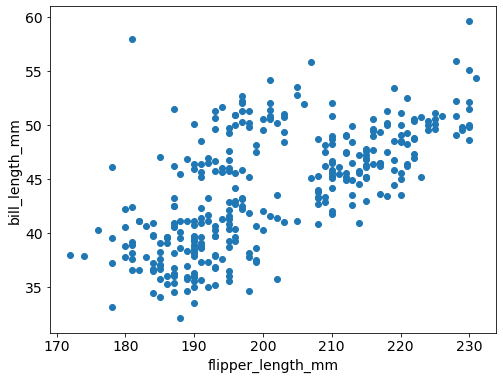

In [155]:
x_col = "flipper_length_mm"
y_col = "bill_length_mm"

plt.scatter(data[x_col], data[y_col])
plt.xlabel(x_col)
plt.ylabel(y_col);

Would you say the two variables are **correlated**? (Is a change in one variable a good predictor of change in the other variable?)

<span style="color:purple"> Try replacing the values of `xcol` and `ycol` with a different choice of two column titles from among `["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]`. </span>

We can fit a line to the data using a **least-squares linear regression** with `scipy.stats.linregress()`.

In [156]:
fit = scipy.stats.linregress(data[x_col], data[y_col])
fit

LinregressResult(slope=0.2548247184821524, intercept=-7.218557988776581, rvalue=0.6530956386670858, pvalue=7.211340708097759e-42, stderr=0.016240696205560894, intercept_stderr=3.2717475483081766)

Let's plot the fit on top of the data.

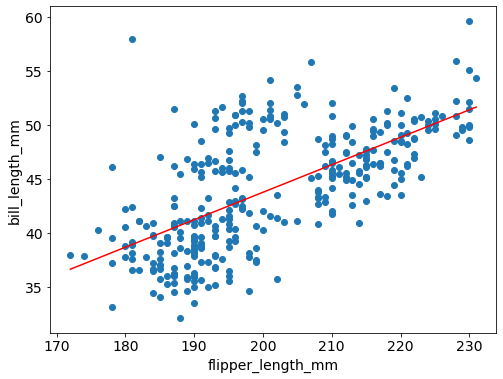

In [157]:
x = np.linspace(np.min(data[x_col]), np.max(data[x_col]), 1000)
y = fit.slope * x + fit.intercept

plt.plot(x, y, color="red")
plt.scatter(data[x_col], data[y_col])
plt.xlabel(x_col)
plt.ylabel(y_col);

The fit also gives us an "$r$ value":

In [ ]:
fit.rvalue

0.6530956386670858

What does this mean? First we need to understand **covariance**.

**Covariance** is a measure of how much of the variation in one variable happens "with" variation in another variable. 

$$\mathrm{cov}(X, Y) :=  \frac{1}{N-1} \sum_{i=1}^N (X_i - \bar X)(Y_i - \bar Y) $$

where the line above indicates the mean value of the entire quantity. For our chosen data columns, the covariance is:

In [159]:
mu_x = data[x_col].mean()
mu_y = data[y_col].mean()
N = len(data)

cov_XY = sum((data[x_col] - mu_x) * (data[y_col] - mu_y)) / (N - 1)
print(cov_XY)

50.05819494192987


Notice that the covariance of a variable with itself is just its **variance**, the square of its standard deviation. 

$$ \mathrm{cov}(X, X) = \frac{1}{N-1} \sum_{i=1}^N (X_i - \bar X)^2 = s^2_X $$ 

In [160]:
(data[x_col].var(), data[y_col].var())

(196.44167661637542, 29.906333441875603)

We can use `np.cov()` to get all these numbers in a **covariance marix**. 

In [161]:
cov_mat = np.cov(data[x_col], data[y_col])
print(cov_mat)

[[196.44167662  50.05819494]
 [ 50.05819494  29.90633344]]


We can "standardize" the covariance values by defining the **Pearson correlation coefficient**

$$ r_{X,Y} := \frac{\mathrm{cov}(X, Y)}{s_X s_Y} $$ 

In [162]:
s_X = data[x_col].std()
s_Y = data[y_col].std()

r_XY = cov_XY / (s_X * s_Y)
print(r_XY)

0.6530956386670858


The Pearson correlation coefficient is what the linear regression calculates as its "$r$ value":

In [163]:
fit.rvalue

0.6530956386670858

Notice that $$ r_{X, X} = \frac{\mathrm{cov}(X, X)}{s_X^2} = \frac{s_X^2}{s_X^2} = 1$$ 

and likewise $r_{Y, Y} = 1$. A value of $r=1$ implies "perfect correlation"; of course, a variable must be perfectly correlated with itself.

In general, $r_{X, Y} = r_{Y, X}$ will always lie between -1 and 1. We can get a matrix of correlation coefficients using `np.corrcoef()`.

In [136]:
np.corrcoef(data[x_col], data[y_col])

array([[1.        , 0.65309564],
       [0.65309564, 1.        ]])

Here, $r_{X,Y}$ is positive, indicating that a penguin with larger flipper length is likely to have larger bill length as well.

On the other hand, if one variable most often *decreases* when the other increases, we get a negative correlation coefficient. For example:

array([[ 1.       , -0.5777917],
       [-0.5777917,  1.       ]])

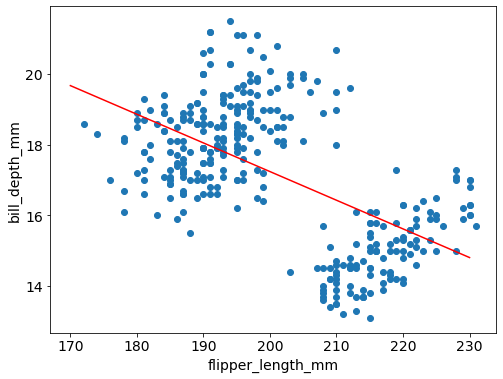

In [193]:
x_col = "flipper_length_mm"
y_col = "bill_depth_mm"
plt.scatter(data[x_col], data[y_col])
plt.xlabel(x_col)
plt.ylabel(y_col)

fit = scipy.stats.linregress(data[x_col], data[y_col])
x = np.linspace(170, 230, 1000)
y = fit.slope * x + fit.intercept
plt.plot(x, y, color="red")

np.corrcoef(data[x_col], data[y_col])


Since $r$ is always between $-1$ and $1$, $r^2$ must always lie between $0$ and $1$. 
* $r^2=1$ implies a perfect linear relationship: a change in one variable perfectly predicts a proportional change in the other.
* $r^2\approx 0$ implies a lack of linear relationship: the variables may be truly uncorrelated, or they may have a more complicated relationship than a linear one.

As an artificial example: take $y = (x-205)^2$:

r^2 = 0.049738950637142766


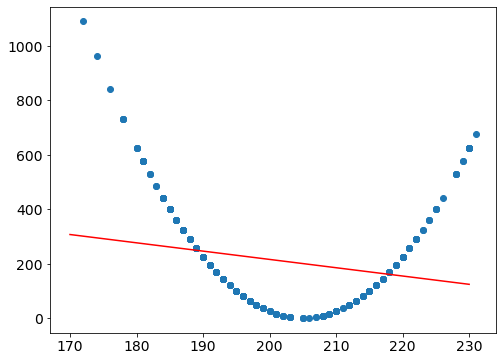

In [167]:
y_data = (data[x_col]-205)**2
plt.scatter(data[x_col], y_data)
fit = scipy.stats.linregress(data[x_col], y_data)
x = np.linspace(170, 230)
y = fit.slope * x + fit.intercept
plt.plot(x, y, color="red")

print(f"r^2 = {fit.rvalue**2}")

Clearly the datasets are correlated... just not in a linear way.

`np.corrcoef` can find the matrix of correlation coefficients across any number of variables:

In [195]:
corr_coef_mat = np.corrcoef(data[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].T)
print(corr_coef_mat)

[[ 1.         -0.22862564  0.65309564  0.58945111]
 [-0.22862564  1.         -0.5777917  -0.47201566]
 [ 0.65309564 -0.5777917   1.          0.8729789 ]
 [ 0.58945111 -0.47201566  0.8729789   1.        ]]


These matrices are often visualized using a **heat map** (also called a **density plot**):

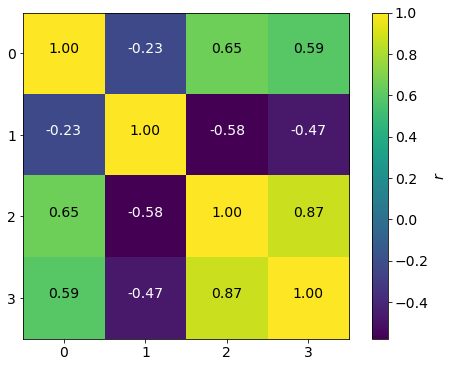

In [196]:
plt.imshow(corr_coef_mat)  # heat map
plt.colorbar(label=r"$r$")  # color bar
plt.yticks(range(4))

# labels for heat map
for i in range(4):
    for j in range(4):
        r = corr_coef_mat[i,j]
        color = "white" if r < 0 else "black"
        plt.text(i, j, f"{r:.2f}", ha="center", color=color)